# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: *Manalo Jr., Darwin*\
_Student No._:2022-10113\
_Section_: THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: October 19, 2024

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

Sign here with your full name: Darwin P. Manalo Jr.

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/30
* Problem 2 - []/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts.)*


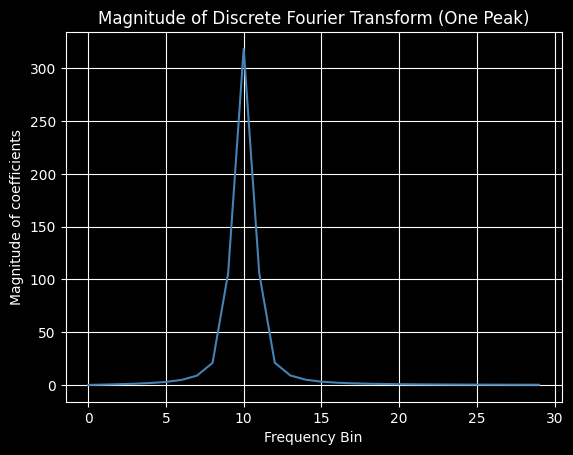

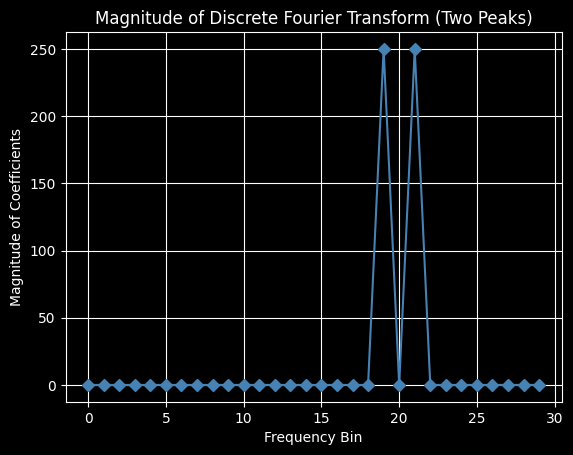

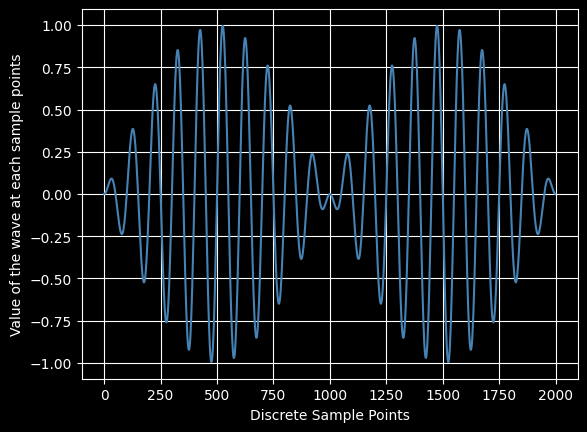

In [7]:
from cmath import exp
from math import sin, pi
import numpy as np
import matplotlib.pyplot as plt
from numpy import zeros, empty
# Defining the given modulated sine wave
def modulated_sine_wave(n,N): # where N is the number of evenly spaced points and n is the value where the wave is evaluated
  return sin(pi*n/N)*sin(20*pi*n/N)

# Defining the function that will calculate the DFT of y
def dft(y): # where y is the array at which the value of the wave at each sample point is contained
  N = len(y) # N here is the length of the array
  c = np.zeros(N//2+1, complex) # This stores the complex Fourier coefficients
  for k in range(N//2+1): # This nested loops iterate over each frequency bin 'k' and each sample point 'n'
    for n in range(N):
      c[k] += y[n]*exp(-2j * pi * k * n / N)
  return c
N = 1000 # number of evenly spaced sample points
# Calculating the coefficients of half the wave function
y_1 =  [modulated_sine_wave(n, N) for n in range(0, N, 1)] # Generates values of the modulated sine wave for half of the sample points (Single Peak)
c_1 =  dft(y_1) # Computes the DFT of y_1
# Calculating the coefficients of the whole wave function
y_2 =  [modulated_sine_wave(n, N) for n in range (0, 2*N, 2)] # Generates values for a full cycle of the modulated sine wave (Double Peaks)
c_2 = dft(y_2) # Computes the DFT of y_2
# For the range of values of the discrete sample points
x_0 = 0 # starting value of the discrete sample points
x = 2000 # last value of the discrete sample points
x_n = np.linspace(x_0, x, N, endpoint = False) # This creates an array of N evenly spaced points to represent the discrete sample points
# Calculating the value of the wave at each sample points.
y_n = empty(N) # This loop populates y_n with wave values computed at each point in x_n
for i in range(N):
  y_n[i] = modulated_sine_wave(x_n[i], N)
# Plotting the magnitude of DFT for the half of the wave function (Single Peak)
plt.style.use('dark_background') # used to darken the background
plt.plot(abs(c_1)[0:30], color = "steelblue")
plt.xlabel("Frequency Bin") # x-axis label of the plot
plt.ylabel("Magnitude of coefficients") # y-axis label of the plot
plt.title("Magnitude of Discrete Fourier Transform (Single Peak)") # title of the plot
plt.grid() # used to show the gridlines of the plot
plt.show()
print("")
# Plotting the magnitude of DFT for the whole wave function (Double Peaks)
plt.plot(abs(c_2)[0:30], color = 'steelblue', marker = 'D')
plt.xlabel("Frequency Bin") # x-axis label of the plot
plt.ylabel("Magnitude of Coefficients") # y-axis label of the plot
plt.title("Magnitude of Discrete Fourier Transform (Double Peaks)") # title of the plot
plt.style.use('dark_background') # used to darken the background
plt.grid()
plt.show()
print("")
# Plotting the modulated sine wave versus discrete sample points
plt.plot(x_n, y_n, color = 'steelblue')
plt.xlabel("Discrete Sample Points") # x-axis label of the plot
plt.ylabel("Value of the wave at each sample points") # y-axis label of the plot
plt.grid() # used to show the gridlines of the plot
plt.show()

This code demonstrates how to generate a modulated sine wave, compute for its Fourier coefficients via DFT and visualize both the frequency components contributing to the overall shape of the wave. The first plot (single peak) shows the magnitudes of the Discrete Fourier Transform coefficients for the first half of the wave which is given initially in the problem as the sample points are only 1000 and since this sample represents only part of the wave the DFT only captures single dominant frequency component resulting to a single peak that corresponds to the modulation created by $\sin(\frac{\pi n}{N})$.While the second plot (double peaks) represents the more extensive samples for wider range and because of this, the DFT revealed that there are two distinct frequency components leading to two peaks in the plot which corresponds to both components of the modulated sine wave which is given by the two sine functions used in the equation of the modulated sine wave. Therefore, this shows that length and resolution of the sampled data affect the analysis of frequency components in a signal.


### PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [9]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [10]:
!ls drive/My\ Drive/

 Classroom				   'Personal Files'
 ColabNotebooks				   'Physics_131_Notebook_1 (1).pdf'
'Copy of Lec12 2nd 22-23.pdf'		    Physics_131_Notebook_1.pdf
'Lec12 2nd 22-23.pdf'			    SMF
'MANALO Jr._lab_assignment_module1.ipynb'


Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [11]:
file_path = "/content/drive/MyDrive/ColabNotebooks/"

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [13]:
import numpy as np
dow = np.loadtxt(file_path+"dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

In [14]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

Total number of elements (N): 1024


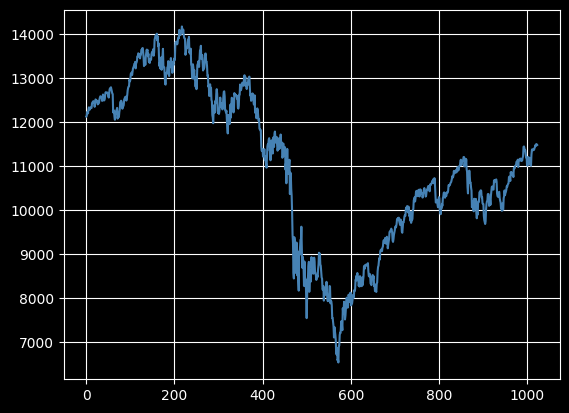

In [15]:
import matplotlib.pyplot as plt # Importing the Matplotlib library
# Total number of elements in dow
print("Total number of elements (N):", len(dow)) # This uses len() function to get the number of the elements in dow which is expected to be an array, list, or similar structure.
plt.plot(dow, color = 'steelblue')
plt.style.use('dark_background')
plt.grid()
plt.show()

In [22]:
from numpy.fft import rfft # Importing the Fast Fourier Transform function from the numpy module
c_k = rfft(dow) # RFFT stands for Real Fast Fourier Transform which is used to optimized for real-valued data and computes the FFT efficiently
# The line above means that the Fourier coefficients of the input signal will be an array of complex numbers and each value of c_k corresponds to a specific frequency of the original signal.

In [23]:
# Setting the last 90% of the coefficients to zero
c_k[ int(c_k.size * 0.1) : ] = 0 + 0j # This calculates the index at 10% of the length of the array and sets all the coefficients from this index onward will be zero.
# This process is called low pass filter which only passes signals below its cutoff frequency while disregarding all the signals above it.
# This process results to a filtered signal which is smoother by reducing noise or rapid fluctuations that might be present in the original dataset.

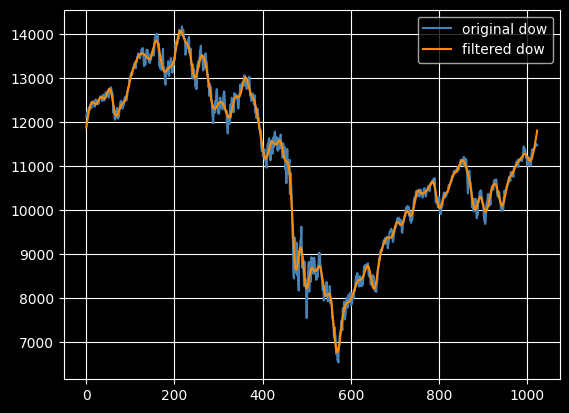

In [24]:
from numpy.fft import irfft # Importing Inverse Fourier Transform
dow_new = irfft(c_k) # This line takes the modified/filtered Fourier coefficients and computes for the Inverse FFT to convert the frequency-domain representation to time-domain signal resulting to a new dow.
plt.plot(dow, color = 'steelblue') # Plot of the original dataset
plt.plot(dow_new, color = 'darkorange') # Plot of the new dataset (filtered)
plt.legend(['original dow', 'filtered dow']) # Comparing the two plots by the smoothness of their plots.
plt.grid()
plt.show()

This line of code applied a low-pass filter to the Fourier coefficients by setting the higher-frequency components to zero so that the Inverse FFT would yield a smoother version of the original signal since it reduced the high-frequency noise.\
We did this due to the relation of the Nyquist Frequency and Sampling rate of the signal. The Nyquist frequency is the highest frequency that can be accurately represented without distortion. It is also the half of the sampling rate of a discrete signal as discussed in the Nyquist theorem so to capture a certain frequency, the sampling rate should twice the frequency of the original to avoid losing information about higher frequencies leading to distortion of the signal. Thus, by filtering out the higher frequency components in the code (setting 90% of the coefficients to zero), the new Nyquist frequency becomes half of the original sampling rate.\
The main application of this process is the Stock Market where the data are often noisy, containing high-frequency fluctuations due to rapid trades or market changes so applying this process will smoothen out these rapid fluctuations which allows for better identification of trends in stock market data, filtering out noise that can distort analysis and predictions.